In [1]:
# Necesary imports

import numpy as np
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
## 1. Get the raw data set

cars0 = glob.glob('vehicles/GTI_Far/*.png')
cars1 = glob.glob('vehicles/GTI_Left/*.png')
cars2 = glob.glob('vehicles/GTI_MiddleClose/*.png')
cars3 = glob.glob('vehicles/GTI_Right/*.png')
cars4 = glob.glob('vehicles/KITTI_extracted/*.png')

notcars = glob.glob('non-vehicles/Extras/*.png')
notcars += glob.glob('non-vehicles/GTI/*.png')

cl0, cl1, cl2, cl3, cl4 = len(cars0), len(cars1), len(cars2), len(cars3), len(cars4)
ncl = len(notcars)

Total # vehicle images: 8792
Total # non-vehicle images: 8968
Image shape: (64, 64, 3)
Image dtype: float32


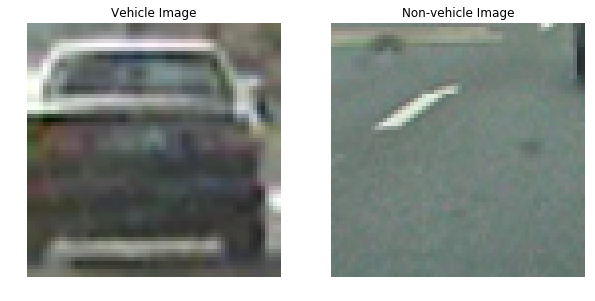

In [3]:
## 2. Initial data set exploratory visulastion and summarisation

imtest = mpimg.imread(cars0[0])

print('Total # vehicle images: {}'.format(np.sum([cl0, cl1, cl2, cl3, cl4])))
print('Total # non-vehicle images: {}'.format(np.sum([ncl])))
print('Image shape: {}'.format(imtest.shape))
print('Image dtype: {}'.format(imtest.dtype))

car_idx = np.random.randint(0, len(cars0))
notcar_idx = np.random.randint(0, len(notcars))

car_img = mpimg.imread(cars0[car_idx])
notcar_img = mpimg.imread(notcars[notcar_idx])

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.axis('off')
plt.title('Vehicle Image')
plt.imshow(car_img)
plt.subplot(122)
plt.axis('off')
plt.title('Non-vehicle Image')
plt.imshow(notcar_img)

In [16]:
# Splitting the data set into Training/Validation/Test set
# with a 80/10/10 split. NO Randomised Shuffling

L70 = (0.8 * np.array([cl0, cl1, cl2, cl3, cl4, ncl])).astype('int')
L90 = (0.9 * np.array([cl0, cl1, cl2, cl3, cl4, ncl])).astype('int')

cars_train = cars0[:L70[0]] + cars1[:L70[1]] + cars2[:L70[2]] + cars3[:L70[3]]\
                + cars4[:L70[4]]
notcars_train = notcars[:L70[5]]

cars_valid = cars0[L70[0]: L90[0]] + cars1[L70[1]: L90[1]]\
                + cars2[L70[2]: L90[2]] + cars3[L70[3]: L90[3]] + cars4[L70[4]: L90[4]]
notcars_valid = notcars[L70[5]: L90[5]]

cars_test = cars0[L90[0]:] + cars1[L90[1]:]\
                + cars2[L90[2]:] + cars3[L90[3]:] + cars4[L90[4]:]
notcars_test = notcars[L90[5]:]

print('# Training vehicle examples: {}'.format(len(cars_train)))
print('# Training non-vehicle examples: {}'.format(len(notcars_train)))
print()
print('# Validation vehicle examples: {}'.format(len(cars_valid)))
print('# Validation non-vehicle examples: {}'.format(len(notcars_valid)))
print()
print('# Test vehicle examples: {}'.format(len(cars_test)))
print('# Test non-vehicle examples: {}'.format(len(notcars_test)))
print()

# Pickling this processed raw dataset of image paths
try:
    print('Pickling the processed raw dataset of image paths...')
    with open('rawdata.p', mode='wb') as f:
        pickle.dump({
            'cars_train': cars_train,
            'notcars_train': notcars_train,
            'cars_valid': cars_valid,
            'notcars_valid': notcars_valid,
            'cars_test': cars_test,
            'notcars_test': notcars_test
        }, f)
    print('Completed successfully!')
    
except Expection as e:
    print('ERROR: Pickling failed with exception: {}'.format(e))

# Training vehicle examples: 7032
# Training non-vehicle examples: 7174

# Validation vehicle examples: 879
# Validation non-vehicle examples: 897

# Test vehicle examples: 881
# Test non-vehicle examples: 897

Pickling the processed raw dataset of image paths...
Completed successfully!


In [17]:
## 3. Feature extraction
L70, L90

(array([ 667,  727,  335,  531, 4772, 7174]),
 array([ 750,  818,  377,  597, 5369, 8071]))

In [6]:
## 4. Another round of data set exploratory visualisation adn summarisation

In [7]:
## 5. Data augmentation / Pre-processing / Split into training/validation/test sets

In [8]:
## 6. Define and implement a model architecture

In [9]:
## 7. Setup training and evaluation pipeline

In [10]:
## 8. Run the training session and evaluate